In [20]:
# Program Project 9
# Import Library
import random

# EMPTY menyatakan tidak ada pohon
# TREE menyatakan ada pohon
# BURNING menyatakan ada pohon yang sedang terbakar
EMPTY, TREE, BURNING = 0, 1, 2

def initForest(n):
  # n adalah jumlah baris dan jumlah kolom dari forest
  # Semua sel diisi dengan TREE tetapi sel yang tengah diisi dengan BURNING
  forest = [[TREE for j in range(n)] for i in range(n)]
  forest[int((n-1)/2)][int((n-1)/2)] = BURNING
  return forest

def periodicLat(lat):
  # lat merupakan matriks forest
  # latNS merupakan gabungan dari baris terakhir lat, lat, 
  # dan baris pertama lat
  latNS = [[0 for j in range(len(lat[0]))] for i in range(len(lat)+2)]
  for i in range(1, len(lat)+1):
    for j in range(len(lat[0])):
      latNS[i][j] = lat[i-1][j]
  for i in range(len(latNS[0])):
    latNS[0][i] = lat[len(lat)-1][i]
    latNS[len(lat)+1][i] = lat[0][i]
  
  # newLatNS merupakan gabungan dari kolom terakhir latNS, latNS, 
  # dan kolom pertama latNS
  newLatNS = [[0 for j in range(len(latNS[0])+2)] for i in range(len(latNS))]
  for i in range(len(latNS)):
    for j in range(1, len(latNS[0])+1):
      newLatNS[i][j] = latNS[i][j-1]
  for i in range(len(newLatNS)):
    newLatNS[i][0] = latNS[i][len(latNS[0])-1]
    newLatNS[i][len(latNS[0])+1] = latNS[i][0]
  return newLatNS

def spread(site, N, E, S, W, burnProbability):
  # site merupakan sel yang dipantau
  # N,E,S,W merupakan sel tetangga dari sel dari arah utara, timur, selatan,
  # dan barat
  # burnProbability merupakan peluang terbakarnya pohon
  if site == EMPTY:
    newSite = EMPTY
  elif site == TREE:
    if N == BURNING or E == BURNING or S == BURNING or W == BURNING:
      rand = random.random()
      if rand < burnProbability:
        newSite = BURNING
      else:
        newSite = TREE
    else:
      newSite = TREE
  else: # site == BURNING
    newSite = EMPTY
  return newSite

def applyExtended(latExt, burnProbability):
  # latExt merupakan perluasan dari matriks forest
  # burnProbability merupakan peluang terbakarnya pohon
  # newLatExt merupakan latExt pada iterasi berikutnya dengan
  # bantuan fungsi spread
  newLatExt = [[0 for i in range(len(latExt[0]))] 
                     for j in range(len(latExt))]
  for i in range(1, len(latExt)-1):
    for j in range(1, len(latExt[0])-1):
      newLatExt[i][j] = spread(latExt[i][j], latExt[i-1][j],
                                       latExt[i][j+1], latExt[i+1][j],
                                       latExt[i][j-1], burnProbability)

  # internalLat merupakan matriks forest di dalam latExt pada iterasi
  # berikutnya
  internalLat = [[0 for j in range(len(latExt[0])-2)]
                 for i in range(len(latExt)-2)]
  for i in range(len(internalLat)):
    for j in range(len(internalLat[0])):
      internalLat[i][j] = newLatExt[i+1][j+1]
  return internalLat

def fire(n, burnProbability, t):
  # n adalah jumlah baris dan jumlah kolom dari forest
  # burnProbability merupakan peluang terbakarnya pohon
  # t merupakan banyaknya iterasi yang dilakukan 
  forest = initForest(n)
  grids = [[0 for j in range(n)] for i in range(n)]
  for i in range(n):
    for j in range(n):
      grids[i][j] = forest[i][j]
  for i in range(t):
    forestExtended = periodicLat(forest)
    forest = applyExtended(forestExtended,burnProbability)
    for i in range(n):
      for j in range(n):
        grids[i][j] = forest[i][j]
  return grids

# Inisialisasi
# Masukan persentase terjadinya kebakaran (burnProbability)
x = float(input("Masukkan persentase terjadinya kebakaran (%) = "))
burnProbability = x/100

# Ukuran grid hutan (nxn)
n = 17

# Jumlah iterasi (t)
t = 20

# Kondisi forest pada akhir simulasi 
newForest = fire(n, burnProbability, t)

# Perhitungan persentase hutan yang terbakar
SUM = 0
for i in range(len(newForest)):
  for j in range(len(newForest[0])):
    if newForest[i][j] == EMPTY or newForest[i][j] == BURNING:
      SUM = SUM + 1
burnPercentage = SUM/n**2*100

# Display persentase hutan yang terbakar
print("Persentase hutan yang terbakar = " + str(burnPercentage) + "%")

Masukkan persentase terjadinya kebakaran (%) = 60
Persentase hutan yang terbakar = 90.65743944636678%


[1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0]
[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0]
[0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0]
[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1]
[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]


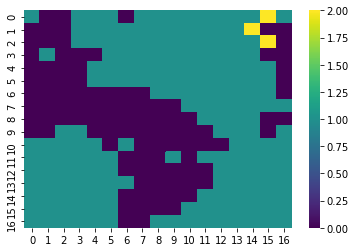

In [ ]:
# Hanya untuk Visualisasi
import seaborn as sns

# Display Hutan dalam bentuk angka2
for i in range(len(newForest)):
  print(newForest[i])

# Display Hutan dalam bentuk heatmap
ax = sns.heatmap(newForest, cmap="viridis", vmax=2,vmin=0)